In [76]:
import matplotlib.pyplot as plt
import numpy as np

In [106]:
def select_best(data, steps, maxK) :
    
    infty = 1e100
    
    ret = []
    
    for i in range (0, steps) :
        left = i * maxK
        right = left + maxK
        curBest = infty
        curAns = 0
        for j in range(left, right) :
            if(data[j] < curBest) :
                curBest = data[j]
                curAns = j
        ret.append(data[curAns])
    
    return np.array(ret)

In [108]:
def give_errors(suffix) :
    dataCF = np.loadtxt('cf_errors_' + suffix)
    dataCB = np.loadtxt('cb_genres/cb_genres_errors_' + suffix)
    dataZbych = np.loadtxt('dbv_errors/dbv_errors_' + suffix, delimiter=',')
    data_rep = []
    for i in range(1, 201) :
        data_rep.append(dataZbych[i][1])
    dataZbych2 = np.loadtxt('ensemble_errors/errors_' + suffix, delimiter=',')
    data_rep2 = []
    for i in range(0, 200) :
        data_rep2.append(dataZbych2[i][3])
    errors = np.concatenate((select_best(dataCF, 4, 200), select_best(dataCB, 1, 200), select_best(data_rep, 1, 200), select_best(data_rep2, 1, 200)))
    return errors


In [109]:
def make_plot(x) :
    suffs = ['newbies.txt', 'popular.txt', 'connoisseur.txt', 'random.txt']
    titles = ['newbie', 'popular', 'connoisseur', 'random']
    obv = np.loadtxt('obv.txt')

    errors = give_errors(suffs[x])
    errors = np.concatenate((np.array([obv[x], obv[x + 4]]), errors))

    perm = [1, 0, 4, 5, 6, 3, 2, 7, 8]
    bars = ('MU', 'MA', 'CF-P', 'CF-C', 'CBF-S', 'CF-R', 'CF-MSE', 'CBF-D', 'CFB-H')
    colors = ('blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red') 
    errors = errors[perm]
    print(errors)
    y_pos = np.arange(len(errors))
    #plt.figure()
    plt.ylim(0.0, 6.5)
    plt.bar(y_pos, errors, color = colors)
    plt.xticks(y_pos, bars)
    plt.ylabel('Average square error')
    plt.title(titles[x])
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


[1.78866    2.04769    2.07767    3.72769    2.06906517 1.97874
 1.45006    6.30522708 2.43774025]


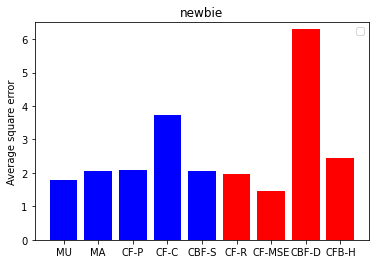

In [110]:
make_plot(0)

[1.67399    1.82579    2.15343    3.61967    1.63906071 1.74279
 1.42534    4.05813723 1.55773767]


No handles with labels found to put in legend.


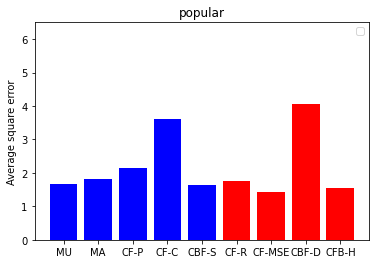

In [111]:
make_plot(1)

[2.06907    1.85415    3.48364    3.48414    2.04783673 3.47557
 3.05567    3.53516732 3.14960732]


No handles with labels found to put in legend.


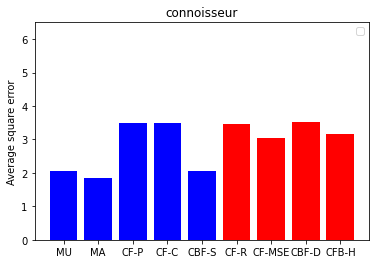

In [112]:
make_plot(2)

[2.88042    3.48414    2.39337    3.52475    1.65225642 2.00875
 1.49333    3.99171346 1.83496184]


No handles with labels found to put in legend.


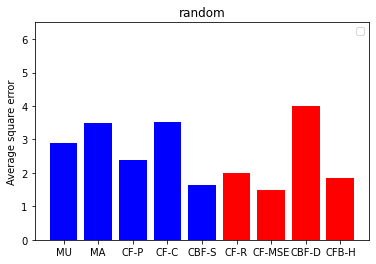

In [113]:
make_plot(3)